# Домашнее задание №1

### **Dataset of depressive posts in Russian language collected from social media** [(paper)](https://www.sciencedirect.com/science/article/pii/S2352340920300895)

Скачать датасет в формате .tsv можно [здесь](https://yadi.sk/d/G5rq-R3AK8SOuw).


В качестве задания предлагается:
1. Использовать ```pandas``` и ряд инструментов для автоматической обработки текстов на русском языке, чтобы ответить на вопросы.
2. Написать функции для извлечения текстовых признаков.

Не рекомендуется использовать ```nltk``` для сегментации/токенизации текстов, поскольку существуют инструменты, которые выполняют свою задачу для русского значительно лучше – их мы обсуждали с вами на занятии.


**Дедлайн**: 23 сентября 23:59

In [ ]:
!wget -c https://www.dropbox.com/s/soyfu6d6y456qk2/depression_data.tsv

--2020-09-23 18:17:16--  https://www.dropbox.com/s/soyfu6d6y456qk2/depression_data.tsv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/soyfu6d6y456qk2/depression_data.tsv [following]
--2020-09-23 18:17:17--  https://www.dropbox.com/s/raw/soyfu6d6y456qk2/depression_data.tsv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce472377f282472ad58ad4ee0d7.dl.dropboxusercontent.com/cd/0/inline/A__2ydQunu45Luc-0z--HISSXpKhFRkT-wchXhiXrVyT0DuxOsbWspH5EjTJ21_Yc98R7V4f4mkK4cHYBb6C-uLI5ktL8oFj8Arif2wDSfkrBIVAErRUSiQ03mti4MAso5I/file# [following]
--2020-09-23 18:17:17--  https://uce472377f282472ad58ad4ee0d7.dl.dropboxusercontent.com/cd/0/inline/A__2ydQunu45Luc-0z--HISSXpKhFRkT-wchXhiXrVyT0DuxOsbWspH5EjTJ21_Yc98R7V4f4mkK4cHYBb6C-uLI5ktL8

In [1]:
import pandas as pd

df = pd.read_csv("depression_data.tsv", sep="\t")
df.head()

,text,label,age
0,"Когда-то я был добрым романтиком, который стре...",1,32.0
1,Здраствуйте! Я каждый день просыпаюсь с мыслью...,1,28.0
2,У меня проблемы с девушкой. Каждую ссору я не ...,1,16.0
3,"Вся моя жизнь это один сплошной ад, в котором ...",1,32.0
4,Я хочу уснуть и не проснуться.каждый день одно...,1,14.0


### Часть 1: Простая статистика (2 балла)

Зачастую в данных, с которыми вы работаете, может быть много неприятных для обработки вещей. Например, мы видим, что в колонке ```age``` очень грязные значения.

In [ ]:
df["age"].value_counts()

16.0      1823
17.0      1811
18.0      1661
15.0      1582
20.0      1543
          ... 
116.0        1
295.0        1
2425.0       1
92.0         1
830.0        1
Name: age, Length: 128, dtype: int64

1. Найдите среднее значение возраста в диапазоне от 14 до 50 лет включительно.

In [ ]:
df[(df['age']>13) & (df['age']<51)]['age'].mean()

22.704171601526518

2. Какую долю 16-летние авторы составляют в диапазоне от 16 до 26 лет включительно?

In [ ]:
df[df['age']==16].shape[0]/df[(df['age']>15) & (df['age']<27)].shape[0]

0.1259412780656304

3. Сколько в датасете текстов, авторам которых 28 или 30 лет?

In [ ]:
df[(df['age']==28) | (df['age']==30)].shape[0]

1185

4. С помощью одной встроенной в ```pandas``` функции отобразите всю статистику по колонке ```age``` в диапазоне от 18 до 30 лет включительно.

In [ ]:
df[(df['age']>17) & (df['age']<31)]['age'].describe()

count    13205.000000
mean        22.676638
std          3.550254
min         18.000000
25%         20.000000
50%         22.000000
75%         25.000000
max         30.000000
Name: age, dtype: float64

5. Сколько в датасете положительных / отрицательных примеров?

In [ ]:
df['label'].value_counts()

0    32021
1    32018
Name: label, dtype: int64

### Часть 2: Предобработка (3 балла)

In [ ]:
!pip install razdel
!python -m pip install pymorphy2[fast]

     |████████████████████████████████| 61kB 1.8MB/s 
     |████████████████████████████████| 8.0MB 4.7MB/s 
     |████████████████████████████████| 378kB 49.7MB/s 
  Created wheel for DAWG: filename=DAWG-0.8.0-cp36-cp36m-linux_x86_64.whl size=846043 sha256=770322675e9d74f85404434fffe2379cc479f12b77873721ea71b561eaa29f41
  Stored in directory: /root/.cache/pip/wheels/3d/1f/f0/a5b1f9d02e193c997d252c33d215f24dfd7a448bc0166b2a12
Successfully built DAWG


In [2]:
import nltk
import pymorphy2
from string import punctuation
from nltk.corpus import stopwords
from razdel import sentenize, tokenize

nltk.download('stopwords')
stopwords = stopwords.words('russian')
punkt = punctuation + '«»—…“”*№–'
morph = pymorphy2.MorphAnalyzer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1. Посчитайте количество предложений в каждом тексте. Сохраните эти значения в отдельной колонке датафрейма.

In [3]:
df['sent_count'] = df['text'].apply(lambda x: len(list(sentenize(x))))
df.head()

,text,label,age,sent_count
0,"Когда-то я был добрым романтиком, который стре...",1,32.0,15
1,Здраствуйте! Я каждый день просыпаюсь с мыслью...,1,28.0,6
2,У меня проблемы с девушкой. Каждую ссору я не ...,1,16.0,10
3,"Вся моя жизнь это один сплошной ад, в котором ...",1,32.0,5
4,Я хочу уснуть и не проснуться.каждый день одно...,1,14.0,18


2. Напишите функцию для токенизации текста. Удалите стоп-слова.


   *я сразу здесь же удалю пунктуацию, потому что мне кажется, это логично*
   
   *и приведу все к нижнему регистру, а то что-то из стоп-слов может удалиться,  а что-то - нет*

In [4]:
def tokenizing(text):
  tokens = list(tokenize(text))
  tokens = [_.text.lower() for _ in tokens if _.text.lower() not in stopwords and _.text not in punkt]
  return tokens

3. Посчитайте количество токенов в тексте (без стоп-слов). Найдите среднее этих значений как по всей выборке, так и внутри каждого класса. 

In [5]:
df['tokens_count'] = df['text'].apply(lambda x: len(tokenizing(x)))
df.head()

,text,label,age,sent_count,tokens_count
0,"Когда-то я был добрым романтиком, который стре...",1,32.0,15,157
1,Здраствуйте! Я каждый день просыпаюсь с мыслью...,1,28.0,6,64
2,У меня проблемы с девушкой. Каждую ссору я не ...,1,16.0,10,43
3,"Вся моя жизнь это один сплошной ад, в котором ...",1,32.0,5,25
4,Я хочу уснуть и не проснуться.каждый день одно...,1,14.0,18,199


In [ ]:
df['tokens_count'].mean()

110.29799028716876

In [ ]:
df.groupby(['label'])['tokens_count'].mean()

label
0    147.988570
1     72.603879
Name: tokens_count, dtype: float64

4. Напишите функцию, которая переводит текст в последовательность лемм.

In [7]:
def lemmatizing(text, morph=morph):
  return [morph.parse(word)[0].normal_form for word in tokenizing(text)]

5. Напишите функцию, которая переводит текст в последовательность частеречных тегов.

In [8]:
def pos_tagging(text, morph=morph):
  return [morph.parse(word)[0].tag.POS for word in tokenizing(text)]

6. Какие слова мы можем добавить в список стоп-слов? Приведите примеры и объясните, почему.

*Посмотрим на первые 20 лемматизированных текстов, чтобы прикинуть, что может быть стоп-словами:*

In [ ]:
for t in df['text'][:20].values:
  print(lemmatizing(t))
  print('\n')

['когда-то', 'добрый', 'романтик', 'который', 'стремиться', 'помочь', 'весь', 'попросить', 'жалко', 'верить', 'человечность', 'однако', 'это', 'фальший', 'суррогатный', 'дружба', 'какой-то', 'непонятный', 'отношение', 'девушка', 'который', 'клясться', 'любить', 'итог', 'изменить', 'уйти', 'другой', 'появиться', 'бесперспективный', 'попросту', 'достаточный', 'достаток', 'собственный', 'жильё', 'родитель', 'шизофрения', 'f', '20.2', 'никто', 'поддерживать', 'поддерживать', 'итак', 'отдавать', 'кусочек', 'каждый', 'потерять', 'свой', 'душевный', 'тепло', 'стать', 'безразличный', 'апатия', 'бывший', 'девушка', 'всякий', 'усилие', 'найти', 'новый', 'который', 'сразу', 'жениться', 'возить', 'разный', 'страна', 'мир', 'браться', 'любой', 'работа', 'показать', 'плохой', 'часто', 'обманывать', 'недоплачивать', 'оплачивать', 'вовсе', 'простой', 'неудачник', 'который', 'потерять', 'смысл', 'жизнь', 'мой', 'ситуация', 'спасать', 'внешность', 'ужасный', 'попросту', 'урод', 'часто', 'завидовать', 'к

*Можно заметить, что осталось много служебных слов, которые не имеют собственного смысла, в отдельности от всего предложения. Например: "это", "кто", "очень", "все", "туда", "сюда". В каждом предложении эти слова имеют разный смысл, и имеют привязку к совершенно разным словам. Поэтому, по сути, даже нельзя считать, что все эти слова - одно и то же. Поэтому я бы внесла их в стоп-слова. Вообще, очень странно, что слова "это" нет в классическом списке nltk* 

*Также многие посты начинаются с похожих фраз, типа "здравствуйте", "каждый день я....", "последнее время/последний год я..." и т.д. Они совершенно не имеют значения для нас, поэтому их тоже можно внести в стоп-слова в рамках этого датасета.*

### Часть 3: Визуализация (1 балл)

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

1. Визуализируйте распределение количество предложений / текст.

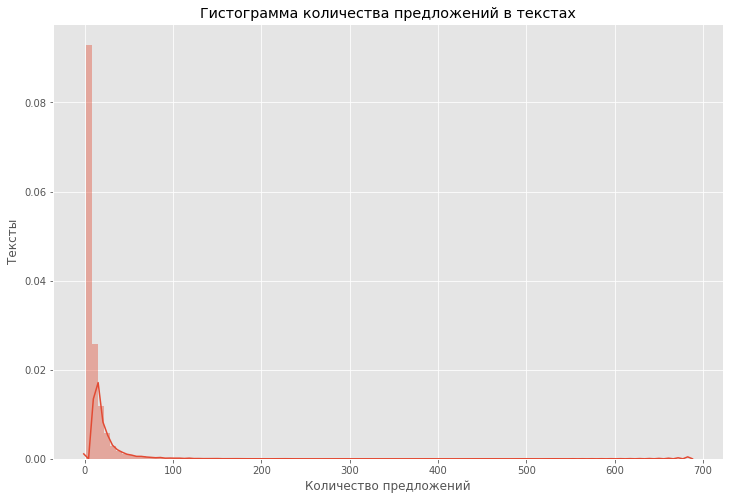

In [33]:
plt.figure(figsize=(12,8))
sns.distplot(df['sent_count'], bins=100);
plt.title('Гистограмма количества предложений в текстах')
plt.xlabel('Количество предложений')
plt.ylabel('Тексты');

2. Визуализируйте распределение количество-предложений / текст внутри каждого класса.

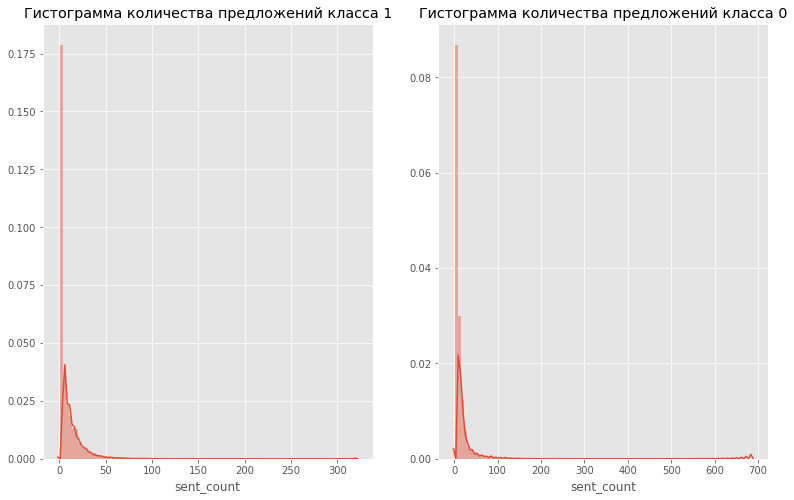

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(13, 8))
ax1 = sns.distplot(df[df['label']==1]['sent_count'], bins=100, ax=axes[0])
ax2 = sns.distplot(df[df['label']==0]['sent_count'], bins=100, ax=axes[1])
ax1.set_title('Гистограмма количества предложений класса 1')
ax2.set_title('Гистограмма количества предложений класса 0')
plt.show()

3. Верно ли, что количество предложений в тексте коррелирует с возрастом автора в подвыборке от 16 до 32 лет включительно? Если да, какая это корреляция – положительная или отрицательная? Визуализируйте матрицу корреляции.

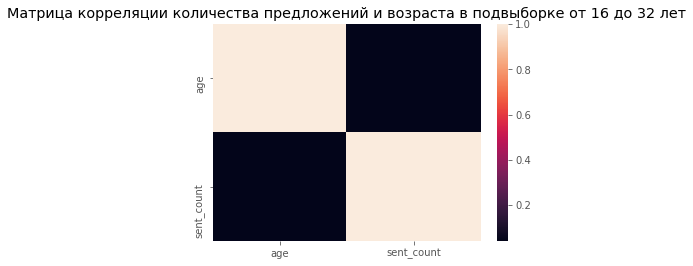

In [46]:
sub_df = df[(df['age']>15) & (df['age']<33)]
sub_df = sub_df[['age', 'sent_count']]
sns.heatmap(sub_df.corr())
plt.title('Матрица корреляции количества предложений и возраста в подвыборке от 16 до 32 лет')
plt.show()

Значение корреляции между признаком "возраст" и "количество предложений" меньше или в районе значения 0.2. Это значит, что эти признаки фактически между собой не коррелируют.
 

### Часть 4: Извлечение текстовых признаков (4 балла)

1. Самостоятельно реализуйте функцию для получения посимвольных н-грамм (без использования библиотек).

In [ ]:
def char_ngrams(text, n):
  return [text[i:i+n] for i in range(len(text))]

text = "уставшая мама мыла грязную раму"
char_ngrams(text, 3)[:10]

['уст', 'ста', 'тав', 'авш', 'вша', 'шая', 'ая ', 'я м', ' ма', 'мам']

In [ ]:
# пример работы функции

text = "уставшая мама мыла грязную раму"

char_ngrams(text, n=3)[:10]

['уст', 'ста', 'тав', 'авш', 'вша', 'шая', 'ая ', 'я м', ' ма', 'мам']

2. Самостоятельно реализуйте функцию для получения пословных н-грамм (без использования библиотек).

In [ ]:
def word_ngrams(text, n):
  words = tokenizing(text)
  return [words[i:i+n] for i in range(len(words)-n+1)]

text = "уставшая мама мыла грязную раму"
word_ngrams(text, 3)

[['уставшая', 'мама', 'мыла'],
 ['мама', 'мыла', 'грязную'],
 ['мыла', 'грязную', 'раму']]

In [ ]:
word_ngrams(text, 4)

[['уставшая', 'мама', 'мыла', 'грязную'], ['мама', 'мыла', 'грязную', 'раму']]

In [ ]:
# пример работы функции

word_ngrams(text, n=3)

[['уставшая', 'мама', 'мыла'],
 ['мама', 'мыла', 'грязную'],
 ['мыла', 'грязную', 'раму']]

In [ ]:
# пример работы функции

word_ngrams(text, n=4)

[['уставшая', 'мама', 'мыла', 'грязную'], ['мама', 'мыла', 'грязную', 'раму']]

3. Самостоятельно реализуйте функцию для получения н-грамм лемм (без использования библиотек).

In [ ]:
def lemma_ngrams(text, n, morph=morph):
  seq = lemmatizing(text)
  return [seq[i:i+n] for i in range(len(seq)-n+1)]

lemma_ngrams(text, 3)

[['устать', 'мама', 'мыло'],
 ['мама', 'мыло', 'грязный'],
 ['мыло', 'грязный', 'рама']]

In [ ]:
lemma_ngrams(text, 4)

[['устать', 'мама', 'мыло', 'грязный'], ['мама', 'мыло', 'грязный', 'рама']]

In [ ]:
# пример работы функции

lemma_ngrams(text, n=3)

[['устать', 'мама', 'мыло'],
 ['мама', 'мыло', 'грязный'],
 ['мыло', 'грязный', 'рам']]

In [ ]:
# пример работы функции

lemma_ngrams(text, n=4)

[['устать', 'мама', 'мыло', 'грязный'],
 ['мама', 'мыло', 'грязный', 'рам']]

4. Самостоятельно реализуйте функцию для получения н-грамм частеречных тегов (без использования библиотек).

In [ ]:
def pos_ngrams(text, n, morph=morph):
  seq = pos_tagging(text)
  return [seq[i:i+n] for i in range(len(seq)-n+1)]

pos_ngrams(text, 3)

[['PRTF', 'NOUN', 'NOUN'], ['NOUN', 'NOUN', 'ADJF'], ['NOUN', 'ADJF', 'NOUN']]

In [ ]:
pos_ngrams(text, 4)

[['PRTF', 'NOUN', 'NOUN', 'ADJF'], ['NOUN', 'NOUN', 'ADJF', 'NOUN']]

In [ ]:
# пример работы функции

pos_ngrams(text, n=3)

[['PRTF', 'NOUN', 'NOUN'], ['NOUN', 'NOUN', 'ADJF'], ['NOUN', 'ADJF', 'NOUN']]

In [ ]:
# пример работы функции

pos_ngrams(text, n=4)

[['PRTF', 'NOUN', 'NOUN', 'ADJF'], ['NOUN', 'NOUN', 'ADJF', 'NOUN']]

5. Самостоятельно реализуйте функцию для получения частотного словаря частеречных тегов по коллекции документов.

In [9]:
from tqdm.notebook import tqdm

In [10]:
def build_pos_dict(corpus):
  pos_dict = {}
  for text in tqdm(corpus):
    tags = pos_tagging(text)
    for pos in tags:
      if pos in pos_dict.keys():
        pos_dict[pos] += 1
      else:
        pos_dict[pos] = 1
  return pos_dict

corpus = [
    "мама мыла уставшую раму",
    "высшая школа экономики",
    "компьютерная лингвистика",
    "осень наступила"
]

build_pos_dict(corpus)

{'ADJF': 2, 'NOUN': 7, 'PRTF': 1, 'VERB': 1}

In [ ]:
# пример работы функции

corpus = [
    "мама мыла уставшую раму",
    "высшая школа экономики",
    "компьютерная лингвистика",
    "осень наступила"
]

build_pos_dict(corpus)

{'ADJF': 2, 'NOUN': 7, 'PRTF': 1, 'VERB': 1}

Для всего датасета:

In [ ]:
build_pos_dict(df['text'])

{'ADJF': 1102687,
 'ADJS': 54107,
 'ADVB': 267188,
 'COMP': 22990,
 'CONJ': 32368,
 'GRND': 20628,
 'INFN': 264475,
 'INTJ': 12620,
 'NOUN': 3214936,
 'NPRO': 57882,
 'NUMR': 19738,
 None: 806414,
 'PRCL': 110080,
 'PRED': 12440,
 'PREP': 40274,
 'PRTF': 64489,
 'PRTS': 51805,
 'VERB': 908252}

6. Постройте частотный словарь лемм по текстам внутри каждого класса. Найдите топ-15 лемм для текстов каждого класса. Есть ли между этими списками пересечение? Если да, сколько лемм пересекается?

In [12]:
def build_lemmas_dict(corpus):
  lemmas_dict = {}
  for text in tqdm(corpus):
    lemmas = lemmatizing(text)
    for l in lemmas:
      if l in lemmas_dict.keys():
        lemmas_dict[l] += 1
      else:
        lemmas_dict[l] = 1
  return lemmas_dict

freq_dict_depressive = build_lemmas_dict(df[df['label']==1]['text'])

In [13]:
freq_dict_nondepressive = build_lemmas_dict(df[df['label']==0]['text'])

In [23]:
print('Для депрессивных постов:')
top15_depressive = sorted(freq_dict_depressive.items(), key=lambda x: x[1], reverse=True)[:15]
for elem in top15_depressive:
  print(elem)

Для депрессивных постов:
('это', 33953)
('...', 31848)
('год', 28565)
('жить', 25568)
('хотеть', 24525)
('жизнь', 24254)
('мочь', 21324)
('человек', 19236)
('очень', 18423)
('мой', 18111)
('знать', 16712)
('просто', 16200)
('который', 14926)
('свой', 14614)
('..', 13568)


*Плохо, что сюда попали троеточие и двоеточие, поскольку выделились как отдельные токены, хотя, может, это говорит о чем-то*

*Видны слова, которые я предполагала внести в список стоп-слов ("это", "год", "очень")*

In [22]:
print('Для недепрессивных постов:')
top15_nondepressive = sorted(freq_dict_nondepressive.items(), key=lambda x: x[1], reverse=True)[:15]
for elem in top15_nondepressive:
  print(elem)

Для недепрессивных постов:
('год', 43943)
('который', 26291)
('это', 16813)
('проект', 16652)
('https', 16424)
('новый', 15775)
('свой', 15479)
('наш', 15433)
('день', 14845)
('город', 14453)
('работа', 14257)
('апрель', 14053)
('также', 13713)
('первый', 13474)
('россия', 13418)


In [25]:
top15_depressive_lemmas = list(dict(top15_depressive).keys())
top15_nondepressive_lemmas = dict(top15_nondepressive).keys()
set(top15_depressive_lemmas).intersection(top15_nondepressive_lemmas)

{'год', 'который', 'свой', 'это'}

*Есть четыре общих леммы, которые, по сути, не имеют собственной семантики*

7. Какие текстовые признаки могли бы быть полезными для решения задачи классификации на этих данных? Приведите примеры и перечислите ресурсы, которые вы бы использовали для конструирования этих признаков.

*Мне кажется, можно придумать достаточно много бинарных признаков на наличие определенных лексических единиц в тексте поста. Например:*

**наличие матерных слов** - *чтобы их обнаружить, достаточно выписать известные матерные слова в список и проверять на вхождение (я уверена, что есть какой-нибудь словарь для какой-нибудь жаргонной лексики)*

**Наличие слов, имеющих резко негативную эмоциональную окраску** - *такие слова как "плохо", "ужасно", "отвратительно", "смерть" и т.д. Их, скорее всего, невозможно выписать вручную в какой-то список. Можно, например, просто на мешке слов обучить простой классификатор и посмотреть на важность слов, может быть, среди них будут похожие слова. Или отдельно обучить классификатор, который будет видеть такие слова-триггеры (может быть не для всех таких слов, а хотя бы для слов, которые подразумевают что-то относящееся к суециду)*

*У меня есть предположение, что депрессивные посты имеют более художественный стиль, очень много описания, много прилагательных, причем достаточно экспрессивных, можно попробовать сделать как признак число прилагательных в посте, readability index. Также мы обнаружили, что в депрессивных постах очень часто используются троеточие, двоеточие, мне кажется, в этом есть некоторая тенденция, это тоже можно использовать*

